## Gradient decent

It is an iterative algorithm
to find the minima of a function. The idea is we start with a random x as a starting
point. We then compute the derivative of the function at this point, which tells us the
magnitude and direction of curvature at this point. We then choose a new x point
based on the old x point, its derivative, and a step-size parameter to control how fast
we move. That is,

$$x_{new} = x_{old}- \alpha*\frac{df}{dx}$$

$\alpha$ is the learning rate.
Deep neural networks are multivariable compositional functions, so we use partial derivatives.
A partial derivative is no more complex than a normal derivative.

Consider the multivariable function f(x,y) = x4 + y2. There is no longer a single
derivative of this function since it has two input variables. We can take the derivative
with respect to x or y or both. When we take the derivative of a multivariable function
with respect to all of its inputs and package this into a vector, we call it the gradient,
which is denoted by the nabla symbol $\nabla$, i.e., $\nabla f(x) = [df/dx,df/dy]$. To compute the
partial derivative of f with respect to x, i.e., df/dx, we simply set the other variable y to
be a constant and differentiate as usual. In this case, $df/dx = 4x^3$ and $df/dy = 2y$. So the
gradient $\nabla f(x) = [4x3,2y]$, which is the vector of partial derivatives. Then we can run
gradient descent as usual, except now we find the vector associated with the lowest
point in an error function of the deep neural network.

### stochastic gradient descent

we implemented our own version of stochastic gradient descent, the stochastic part because we are
randomly taking subsets from the dataset and computing gradients based on that,
which gives us noisy estimates of the true gradient given the full set of data

  0%|          | 0/2000 [00:00<?, ?it/s]/home/ankit/miniconda3/envs/ML/lib/python3.9/site-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/ankit/miniconda3/envs/ML/lib/python3.9/site-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
100%|██████████| 2000/2000 [01:04<00:00, 30.89it/s]


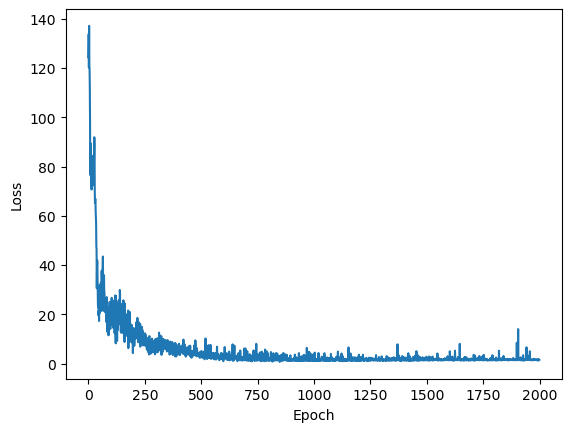

In [ ]:
import torch
import numpy as np
import torchvision as TV
import matplotlib.pyplot as plt
import tqdm 

# Neural network
def nn(x,w1,w2):
    # L1
    l1 = x @ w1
    # Activation function
    l1 = torch.relu(l1)
    # second layer
    l2 = l1 @ w2
    return l2

# Weights to be learned
w1 = torch.randn(784,200,requires_grad=True)
w2 = torch.randn(200,10,requires_grad=True)

mnist_data = TV.datasets.MNIST("MNIST", train=True, download=False)
# Learning rate
lr = 0.001
# Number of epochs
epochs = 2000
batch_size = 100
# Loss function 
lossfn = torch.nn.CrossEntropyLoss()

fig,ax = plt.subplots(1,1)
ax.set_xlabel(r'Epoch')
ax.set_ylabel(r'Loss')

loss_list=[]

# Loop over epochs
for i in tqdm.tqdm(range(epochs)):
    rid = np.random.randint(0,mnist_data.train_data.shape[0],size=batch_size)
    # flatten the image : x(batch_size,28*28)
    x = mnist_data.train_data[rid].float().flatten(start_dim=1)
    x /= x.max()
    # prediction
    pred = nn(x,w1,w2)
    # target label
    target = mnist_data.train_labels[rid]
    # calculate loss
    loss = lossfn(pred,target)
    # backpropagation
    loss.backward()

    # update weights
    with torch.no_grad():
        w1 -= lr * w1.grad
        w2 -= lr * w2.grad

    loss_list.append(loss.item())

ax.plot(loss_list)

### Adam optimizer

The Adam optimizer is a popular stochastic gradient descent (SGD) optimizer used in deep learning. It was introduced in 2014 by Diederik Kingma and Jimmy Lei Ba.

**Key Features:**

1. **Adaptive Learning Rate**: Adam adapts the learning rate for each parameter individually, based on the magnitude of the gradient.
2. **Moment Estimation**: Adam estimates the first and second moments of the gradient (mean and variance) to normalize the gradient.
3. **Bias Correction**: Adam applies bias correction to the moment estimates to account for the initial values.

**How Adam Works:**

1. Initialize the parameters, learning rate, and moment estimates (first and second moments).
2. Compute the gradient of the loss function with respect to the parameters.
3. Update the moment estimates using the gradient.
4. Compute the adaptive learning rate for each parameter using the moment estimates.
5. Update the parameters using the adaptive learning rate and gradient.

**Adam's Advantages:**

1. **Fast Convergence**: Adam converges faster than traditional SGD optimizers.
2. **Robust to Hyperparameters**: Adam is less sensitive to hyperparameter tuning.
3. **Handles Non-Stationary Objectives**: Adam adapts to changing objectives and gradients.

**Common Hyperparameters:**

1. `learning_rate`: Initial learning rate (default: 0.001).
2. `beta1` and `beta2`: Moment estimation decay rates (default: 0.9 and 0.999).
3. `epsilon`: Small value for numerical stability (default: 1e-8).


  0%|          | 0/2000 [00:00<?, ?it/s]/home/ankit/miniconda3/envs/ML/lib/python3.9/site-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
100%|██████████| 2000/2000 [01:25<00:00, 23.35it/s]


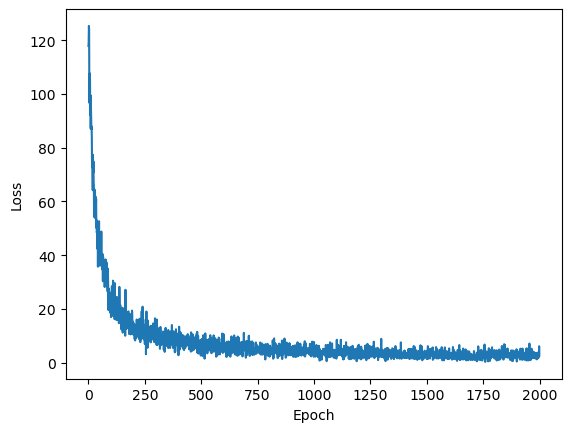

In [17]:
import torch
import numpy as np
import torchvision as TV
import matplotlib.pyplot as plt
import tqdm 

# Neural network
def nn(x,w1,w2):
    # L1
    l1 = x @ w1
    # Activation function
    l1 = torch.relu(l1)
    # second layer
    l2 = l1 @ w2
    return l2

# Weights to be learned
w1 = torch.randn(784,200,requires_grad=True)
w2 = torch.randn(200,10,requires_grad=True)

mnist_data = TV.datasets.MNIST("MNIST", train=True, download=False)
# Learning rate
lr = 0.001
# Number of epochs
epochs = 2000
batch_size = 100
# Loss function 
lossfn = torch.nn.CrossEntropyLoss()
# Adam optimizer
optimizer = torch.optim.Adam([w1,w2],lr=lr)

fig,ax = plt.subplots(1,1)
ax.set_xlabel(r'Epoch')
ax.set_ylabel(r'Loss')

loss_list=[]

# Loop over epochs
for i in tqdm.tqdm(range(epochs)):
    rid = np.random.randint(0,mnist_data.train_data.shape[0],size=batch_size)
    # flatten the image : x(batch_size,28*28)
    x = mnist_data.train_data[rid].float().flatten(start_dim=1)
    x /= x.max()
    # prediction
    pred = nn(x,w1,w2)
    # target label
    target = mnist_data.train_labels[rid]
    # calculate loss
    loss = lossfn(pred,target)
    # backpropagation
    loss.backward()

    # update weights
    optimizer.step()
    # reset gradients
    optimizer.zero_grad()

    loss_list.append(loss.item())

ax.plot(loss_list)

Loss function is much smoother with Adam optimizer